In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wavtools import *

In [2]:
### Signal d'entrée
signal, freq = open_wave( 'input_S.wav' )
signal_fft = np.fft.fft(signal)

### Signal de sortie

#signal_out, freq_out = open_wave( 'received_perfect_S.wav' )
#signal_out_fft = np.fft.fft(signal_out)

#s_out = np.load ('received_S_noise.npy')
#save_wave(s_out, 'received_S_noise.wav', samplefrequency = 48000., samplewidth = 4)
signal_out, freq_out = open_wave( 'received_S_noise.wav' )
signal_out_fft = np.fft.fft(signal_out)

### Convolution
Convol = signal_fft*signal_out_fft
Ifft = np.fft.ifft(Convol)
Signal1 = np.abs(Ifft)


seuil = 20.   ## sur quels critères doit-on fixer le seuil de détection ? 

t = np.arange(0., signal.size/freq, 1/freq)
t0 = 1.
dt_final = t[np.where(Signal1 > seuil)][0] - 2*t0
print("Le temps de trajet calculé par convolution est de %.6fs." %dt_final )

Le temps de trajet calculé par convolution est de 5.667354s.


In [3]:
times = np.load('times.npy') 
sort = sorted(times)
print("Le temps de trajet réel est de %.6fs." %(sort[0] - t0))

Le temps de trajet réel est de 5.666667s.


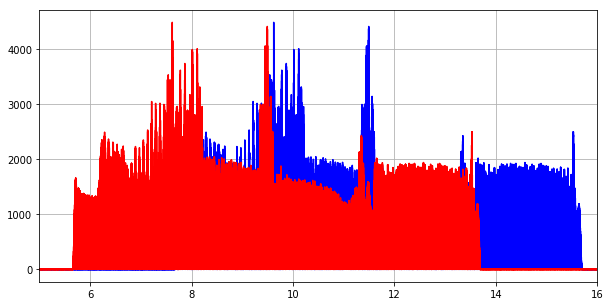

In [4]:
plt.figure(figsize=(10,5))
plt.plot(t, Signal1,'b')
plt.plot(t-2*t0, Signal1, 'r')
plt.xlim([5,16])
plt.grid()

In [ ]:
### Comment fixer le seuil ? 
### Quelle est l'unité de la convolution ?
### Quel lien entre niveau de bruit et seuil à fixer sur la convolution ? 